In [12]:
import random
import pandas as pd

# Define the total numbers for events and attendees
num_events = 100
num_attendees = 1000

# Generate event IDs: e1, e2, ..., e100
event_ids = [f"e{100+i}" for i in range(1, num_events + 1)]

# Generate attendee IDs: a1, a2, ..., a1000
attendee_ids = [f"a{i}" for i in range(1, num_attendees + 1)]

# Initialize an empty list to store the event-attendee pairs
event_attendee_pairs = []

# Loop through each event and assign a random set of attendees
for event in event_ids:
    # Randomly determine the number of attendees for this event (between 30 and 90)
    num_event_attendees = random.randint(1, 25)
    
    # Randomly sample the specified number of unique attendees (without duplicates per event)
    selected_attendees = random.sample(attendee_ids, num_event_attendees)
    
    # Create a dictionary entry for each event-attendee pair and add it to the list
    for attendee in selected_attendees:
        event_attendee_pairs.append({
            'event_id': event,
            'attendee_id': attendee
        })

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(event_attendee_pairs)

# Export the DataFrame to a CSV file
df.to_csv('event_attendee_pairs_future.csv', index=False)

# Optionally, display the first few rows of the DataFrame
print(df.head())


  event_id attendee_id
0     e101        a384
1     e101        a490
2     e101        a648
3     e101        a374
4     e101        a501


In [13]:
df

,event_id,attendee_id
0,e101,a384
1,e101,a490
2,e101,a648
3,e101,a374
4,e101,a501
...,...,...
1293,e200,a204
1294,e200,a200
1295,e200,a53
1296,e200,a519


In [5]:
import pandas as pd
import networkx as nx

# Load the event-attendee dataset from CSV
try:
    df = pd.read_csv('event_attendee_pairs.csv')
except Exception as e:
    print("Error reading CSV file:", e)
    exit(1)

# Create a directed graph. We use a directed graph since the relationship has a direction:
# from attendee to event (i.e., attendee ATTENDED event).
G = nx.DiGraph()

# Iterate through each row in the DataFrame to add nodes and edges to the graph
for index, row in df.iterrows():
    event_id = row['event_id']
    attendee_id = row['attendee_id']

    # Add the event node if it doesn't already exist, with a type attribute
    if not G.has_node(event_id):
        G.add_node(event_id, type='Event')
    
    # Add the attendee node if it doesn't already exist, with a type attribute
    if not G.has_node(attendee_id):
        G.add_node(attendee_id, type='Attendee')
    
    # Add an edge from the attendee to the event with an attribute indicating the relationship
    G.add_edge(attendee_id, event_id, relationship='ATTENDED')

# Print summary information about the graph
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Optionally, save the graph to a file in GEXF format for visualization or further analysis
nx.write_gexf(G, "event_attendee_graph.gexf")
print("Graph saved to 'event_attendee_graph.gexf'")


Graph created with 1098 nodes and 5841 edges.
Graph saved to 'event_attendee_graph.gexf'


In [7]:
import matplotlib.pyplot as plt


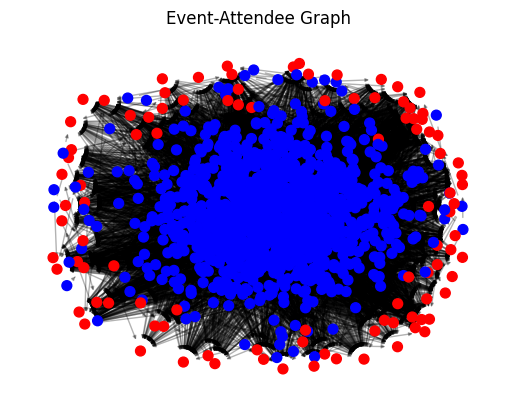

In [8]:
# Use a spring layout for positioning nodes (adjust parameters for clarity)
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Determine node colors based on their type: red for Events, blue for Attendees
node_colors = []
for node in G.nodes():
    if G.nodes[node]['type'] == 'Event':
        node_colors.append('red')
    else:
        node_colors.append('blue')

# Draw nodes and edges; note that drawing labels for large graphs can be cluttered
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.3, arrowsize=5)
# Optionally, draw labels for a clearer view on a smaller subset
# nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Event-Attendee Graph")
plt.axis('off')  # Hide axis
plt.show()

Graph has 998 nodes and 153344 edges.


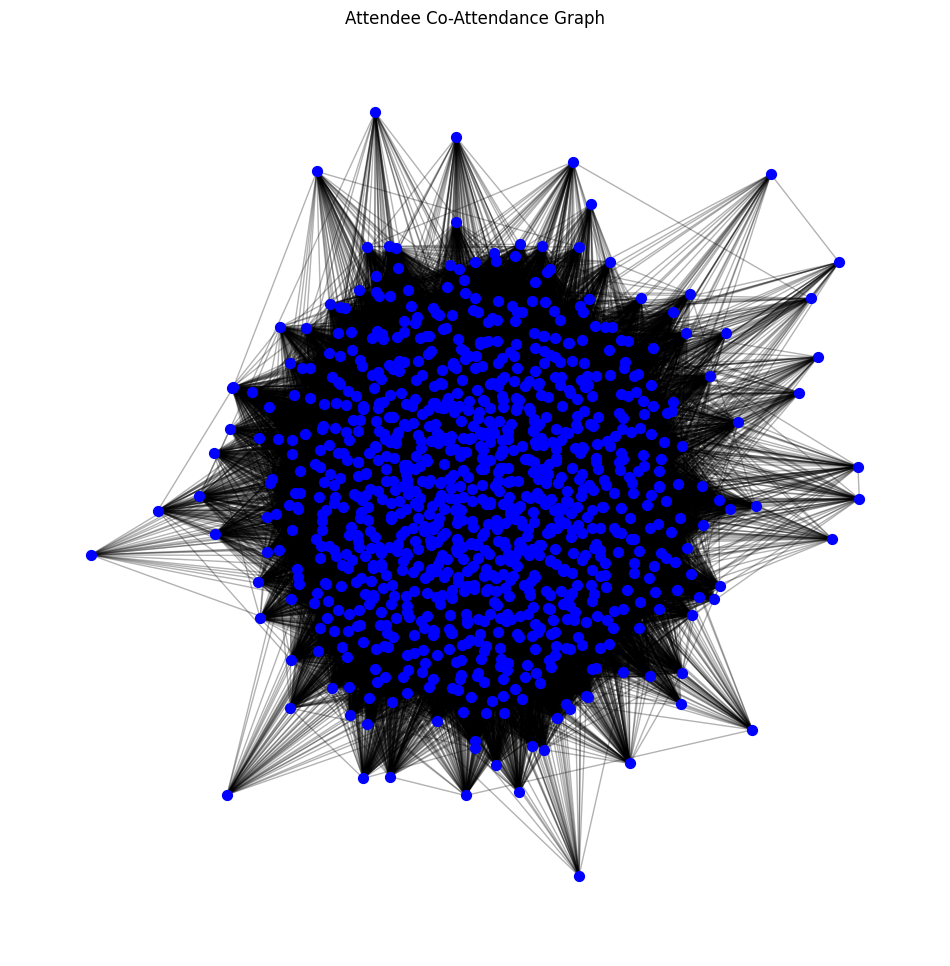

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Load the event-attendee dataset from CSV
try:
    df = pd.read_csv('event_attendee_pairs.csv')
except Exception as e:
    print("Error reading CSV file:", e)
    exit(1)

# Create an undirected graph where nodes represent attendees
G = nx.Graph()

# Group the dataset by event_id to find all attendees for each event
grouped = df.groupby('event_id')

# For each event, connect every pair of attendees with an edge
for event, group in grouped:
    attendees = group['attendee_id'].tolist()
    
    # Add nodes for each attendee (if not already added)
    for attendee in attendees:
        if not G.has_node(attendee):
            G.add_node(attendee)
    
    # Create edges between each pair of attendees using combinations
    for attendee1, attendee2 in itertools.combinations(attendees, 2):
        if G.has_edge(attendee1, attendee2):
            # If the edge already exists, increment the weight (number of shared events)
            G[attendee1][attendee2]['weight'] += 1
        else:
            # Add a new edge with an initial weight of 1
            G.add_edge(attendee1, attendee2, weight=1)

# Print basic information about the graph
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Visualize the graph using matplotlib (note: large graphs may be cluttered)
plt.figure(figsize=(12, 12))
# Compute layout for better visualization
pos = nx.spring_layout(G, k=0.15, iterations=20)
# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue')
# Draw edges with transparency
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Attendee Co-Attendance Graph")
plt.axis('off')  # Hide axes for clarity
plt.show()


In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# -------------------------
# Step 1: Load the dataset
# -------------------------
try:
    df = pd.read_csv('event_attendee_pairs.csv')
except Exception as e:
    print("Error reading CSV file:", e)
    exit(1)

# ---------------------------------------
# Step 2: Create the attendee co-attendance graph
# ---------------------------------------
# Create an undirected graph where each node is an attendee.
G = nx.Graph()

# Group the dataset by event_id so we can connect all attendees that attended the same event.
grouped = df.groupby('event_id')

# For each event, add an edge between every pair of attendees.
for event, group in grouped:
    attendees = group['attendee_id'].tolist()
    
    # Ensure each attendee node exists.
    for attendee in attendees:
        if not G.has_node(attendee):
            G.add_node(attendee)
    
    # For every unique pair of attendees in the same event, add an edge or update its weight.
    for attendee1, attendee2 in itertools.combinations(attendees, 2):
        if G.has_edge(attendee1, attendee2):
            # Increment the weight if the edge already exists (indicating another shared event).
            G[attendee1][attendee2]['weight'] += 1
        else:
            # Create an edge with an initial weight of 1.
            G.add_edge(attendee1, attendee2, weight=1)

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# -------------------------------------------------
# Step 3: Calculate common network centrality measures
# -------------------------------------------------

# Degree Centrality: Fraction of nodes each node is connected to.
degree_centrality = nx.degree_centrality(G)

# Betweenness Centrality: How often a node lies on the shortest paths between other nodes.
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Closeness Centrality: Inverse of the average shortest path distance to all other nodes.
closeness_centrality = nx.closeness_centrality(G)

# Eigenvector Centrality: A measure of node influence considering the influence of its neighbors.
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight')
except nx.NetworkXException as e:
    print("Error computing eigenvector centrality:", e)
    eigenvector_centrality = {}

# Clustering Coefficient: Measure of how nodes tend to form clusters.
clustering_coeff = nx.clustering(G, weight='weight')
average_clustering = nx.average_clustering(G, weight='weight')

# ------------------------------------------
# Step 4: Display summary of centrality measures
# ------------------------------------------
print("\nTop 10 nodes by Degree Centrality:")
for node, cent in sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:10]:
    print(f"{node}: {cent:.4f}")

print("\nTop 10 nodes by Betweenness Centrality:")
for node, cent in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]:
    print(f"{node}: {cent:.4f}")

print("\nTop 10 nodes by Closeness Centrality:")
for node, cent in sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]:
    print(f"{node}: {cent:.4f}")

print("\nTop 10 nodes by Eigenvector Centrality:")
for node, cent in sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:10]:
    print(f"{node}: {cent:.4f}")

print("\nAverage Clustering Coefficient of the graph:", average_clustering)

# ------------------------------------------
# Step 5: Compile all measures into a DataFrame
# ------------------------------------------
centrality_df = pd.DataFrame({
    'degree_centrality': pd.Series(degree_centrality),
    'betweenness_centrality': pd.Series(betweenness_centrality),
    'closeness_centrality': pd.Series(closeness_centrality),
    'eigenvector_centrality': pd.Series(eigenvector_centrality),
    'clustering_coefficient': pd.Series(clustering_coeff)
})

print("\nCentrality Measures DataFrame (first 10 rows):")
print(centrality_df.head(10))


Graph has 998 nodes and 153344 edges.

Top 10 nodes by Degree Centrality:
a377: 0.6289
a330: 0.6018
a313: 0.6008
a423: 0.5988
a535: 0.5787
a417: 0.5737
a645: 0.5657
a721: 0.5647
a720: 0.5607
a804: 0.5567

Top 10 nodes by Betweenness Centrality:
a414: 0.0021
a377: 0.0021
a330: 0.0019
a417: 0.0019
a423: 0.0019
a721: 0.0019
a645: 0.0019
a851: 0.0018
a158: 0.0018
a313: 0.0018

Top 10 nodes by Closeness Centrality:
a377: 0.7293
a330: 0.7152
a313: 0.7147
a423: 0.7137
a535: 0.7036
a417: 0.7011
a645: 0.6972
a721: 0.6967
a720: 0.6948
a804: 0.6928

Top 10 nodes by Eigenvector Centrality:
a377: 0.0769
a423: 0.0713
a330: 0.0698
a535: 0.0695
a313: 0.0691
a720: 0.0648
a804: 0.0646
a417: 0.0645
a87: 0.0637
a645: 0.0630

Average Clustering Coefficient of the graph: 0.09667683423143865

Centrality Measures DataFrame (first 10 rows):
      degree_centrality  betweenness_centrality  closeness_centrality  \
a925           0.362086                0.001020              0.610533   
a464           0.197593   

In [11]:
import networkx as nx

# Assuming G is your previously created graph
# Save the graph in GEXF format
nx.write_gexf(G, "event_attendee_graph.gexf")
print("Graph successfully saved as 'event_attendee_graph.gexf'")


Graph successfully saved as 'event_attendee_graph.gexf'
